In [1]:
import torch
import torchvision

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
device

device(type='cuda', index=0)

In [4]:
model_fn=torchvision.models.resnet50(pretrained=True)

In [5]:
for param in model_fn.parameters():
    param.requires_grad = False

In [6]:
num_fc_features=model_fn.fc.in_features
model_fn.fc=torch.nn.Linear(in_features=num_fc_features,out_features=90)

In [7]:
model_fn.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [8]:
criterion =torch.nn.CrossEntropyLoss()

In [9]:
optimizer_ft = torch.optim.SGD(model_fn.parameters(), lr=0.001, momentum=0.9)

In [10]:
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [11]:
transform=torchvision.transforms.Compose([
    torchvision.transforms.Resize(224),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
])

In [12]:
birds=torchvision.datasets.ImageFolder('F:\\Github\\machine_learn_record\\tensorflow_learn\\datasets\\birds\\train',transform=transform)

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

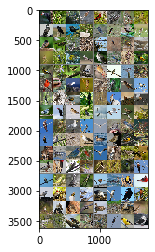

tensor([83, 87,  6, 50, 67, 11, 60, 26,  9, 12,  2, 16, 39, 40, 48, 58, 48, 53,
        56, 59, 83, 18, 26, 81, 60,  6, 79, 18, 74,  6, 61, 47, 26, 62, 81, 46,
         7, 17, 69, 78,  7, 73, 29, 63, 41, 14, 33, 74,  3, 59,  4,  2, 61, 14,
        89, 18, 77, 83, 41, 10, 87, 69, 62, 79, 39, 78, 29, 51, 71, 63, 34, 16,
        63, 34, 41, 32, 21, 78, 47,  3, 21, 23,  5, 68, 50, 46, 81, 26, 42, 85,
        13, 76, 40, 63, 35, 39, 66, 73,  0, 15, 48,  8,  4,  7, 30, 83, 36, 80,
        28, 37,  3, 48, 59, 14, 88, 52, 23, 56, 88, 62, 72, 35, 53, 88, 34, 39,
        22, 31])

In [15]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
labels

In [16]:
def acc():
    right=0
    sums=0
    for i,data in enumerate(trainloader,0):
        inputs, labels = data[0].to(device), data[1].to(device)
        with torch.no_grad():
            rs=model_fn(inputs)
            clazz=torch.argmax(rs,dim=1)
            right+=(labels.cpu().numpy()==clazz.cpu().numpy()).sum()
            sums+=len(labels)
    return right/sums

In [ ]:
for epoch in range(100):
    
    for i,data in enumerate(trainloader,0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer_ft.zero_grad()
        outputs=model_fn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_ft.step()
        
    print("epoch-->",epoch,"acc---->",acc())

acc----> 0.05831589958158996
acc----> 0.17024058577405857
acc----> 0.2785041841004184
acc----> 0.3760460251046025
acc----> 0.4652196652719665
acc----> 0.5167364016736402
acc----> 0.5546548117154811
acc----> 0.5959728033472803
acc----> 0.6221234309623431
acc----> 0.6558577405857741
acc----> 0.6694560669456067
acc----> 0.6848849372384938
acc----> 0.7044979079497908
acc----> 0.7199267782426778
acc----> 0.725418410041841
acc----> 0.7382322175732218
acc----> 0.7460774058577406
acc----> 0.7557531380753139
acc----> 0.7667364016736402
acc----> 0.7656903765690377
acc----> 0.7719665271966527
acc----> 0.7764121338912134
acc----> 0.7847803347280334
acc----> 0.7897489539748954
acc----> 0.7944560669456067
acc----> 0.7923640167364017
acc----> 0.8017782426778243
acc----> 0.805439330543933
acc----> 0.8023012552301255
acc----> 0.8143305439330544


In [ ]:
images, labels = dataiter.next()
images=images.to(device)
rs=model_fn(images)
clazz=torch.argmax(rs,dim=1)
print(clazz)
print(labels)